# Dataset Info



http://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame


This database encodes the **complete set of possible board configurations at the end of tic-tac-toe games**, where "x" is assumed to have played first. 

The target concept is: "win for x" (i.e. positive when "x" has a way to win).


Attributes / Columns:

1. top-left-square: {x,o,b}
2. top-middle-square: {x,o,b}
3. top-right-square: {x,o,b}
4. middle-left-square: {x,o,b}
5. middle-middle-square: {x,o,b}
6. middle-right-square: {x,o,b}
7. bottom-left-square: {x,o,b}
8. bottom-middle-square: {x,o,b}
9. bottom-right-square: {x,o,b}
10. Class: {positive,negative}



# Formatter Functions

In [1]:


# HELPER FUNCTIONS

def fmt_n(large_number):
    """
    Formats a large number with thousands separator, for printing and logging.
    
    Param large_number (int) like 1_000_000_000
    
    Returns (str) like '1,000,000,000'
    """
    return f"{large_number:,.0f}"


def fmt_pct(decimal_number):
    """
    Formats a large number with thousands separator, for printing and logging.
    
    Param decimal_number (float) like 0.95555555555
    
    Returns (str) like '95.5%'
    """
    return f"{decimal_number:.2f}%"


assert fmt_n(1_000_000_000) == '1,000,000,000'
assert fmt_pct(9.67890987) == '9.68%'

# Importing the Data


In [2]:
#
# IMPORT DATA
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
#

from pandas import read_csv

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data"

columns = ["a1", "a2", "a3", "b1", "b2", "b3", "c1", "c2", "c3", "outcome"]

raw_df = read_csv(url, names=columns)
raw_df.head()

,a1,a2,a3,b1,b2,b3,c1,c2,c3,outcome
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


The positive outcome rows are first and the negative outcome rows are later, so we'll have to shuffle the row order / randomize when splitting the data.

In [3]:
print(raw_df["outcome"].value_counts(normalize=True))

positive    0.653445
negative    0.346555
Name: outcome, dtype: float64


there is a 2:1 ratio between positive and negative outcomes. this is generally imbalanced. 

https://machinelearningmastery.com/types-of-classification-in-machine-learning/

# Splitting the Data

In [4]:


# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split


train_df, test_df = train_test_split(raw_df, train_size=0.8, shuffle=True, random_state=99, stratify= raw_df["outcome"])

print("--------------------")
print("TRAIN:", len(train_df))
print(train_df["outcome"].value_counts(normalize=True))

print("--------------------")
print("TEST:", len(test_df))
print(test_df["outcome"].value_counts(normalize=True))

print("--------------------")
train_df

--------------------
TRAIN: 766
positive    0.654047
negative    0.345953
Name: outcome, dtype: float64
--------------------
TEST: 192
positive    0.651042
negative    0.348958
Name: outcome, dtype: float64
--------------------


,a1,a2,a3,b1,b2,b3,c1,c2,c3,outcome
783,o,x,o,o,b,x,o,x,x,negative
468,o,b,o,o,b,x,x,x,x,positive
405,o,o,x,b,b,x,o,x,x,positive
820,o,o,o,x,o,x,x,x,b,negative
874,o,b,b,o,x,x,o,x,b,negative
...,...,...,...,...,...,...,...,...,...,...
232,x,b,x,o,x,b,o,o,x,positive
449,o,b,x,b,x,o,x,b,b,positive
381,o,o,x,o,x,x,x,x,o,positive
838,o,o,o,b,x,x,o,x,x,negative


# Feature Selection

In [5]:
target_col = "outcome"

feature_cols = columns
if target_col in feature_cols:
    feature_cols.remove(target_col)
print("FEATURE COLS:", feature_cols)

train_x = train_df[feature_cols]
train_y = train_df[[target_col]]

test_x = test_df[feature_cols]
test_y = test_df[[target_col]]

FEATURE COLS: ['a1', 'a2', 'a3', 'b1', 'b2', 'b3', 'c1', 'c2', 'c3']


In [6]:
train_x

,a1,a2,a3,b1,b2,b3,c1,c2,c3
783,o,x,o,o,b,x,o,x,x
468,o,b,o,o,b,x,x,x,x
405,o,o,x,b,b,x,o,x,x
820,o,o,o,x,o,x,x,x,b
874,o,b,b,o,x,x,o,x,b
...,...,...,...,...,...,...,...,...,...
232,x,b,x,o,x,b,o,o,x
449,o,b,x,b,x,o,x,b,b
381,o,o,x,o,x,x,x,x,o
838,o,o,o,b,x,x,o,x,x


In [7]:
train_y

,outcome
783,negative
468,positive
405,positive
820,negative
874,negative
...,...
232,positive
449,positive
381,positive
838,negative


# Feature Matrix Encoding

In [8]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

encoder.fit(train_x) 

features = encoder.get_feature_names_out()
print("FEATURES :", fmt_n(len(features)))
print(features)

train_m = encoder.transform(train_x)
test_m = encoder.transform(test_x)

FEATURES : 27
['a1_b' 'a1_o' 'a1_x' 'a2_b' 'a2_o' 'a2_x' 'a3_b' 'a3_o' 'a3_x' 'b1_b'
 'b1_o' 'b1_x' 'b2_b' 'b2_o' 'b2_x' 'b3_b' 'b3_o' 'b3_x' 'c1_b' 'c1_o'
 'c1_x' 'c2_b' 'c2_o' 'c2_x' 'c3_b' 'c3_o' 'c3_x']


In [9]:
print(train_m.shape)
print(test_m.shape)

(766, 27)
(192, 27)


In [10]:
print(train_m[0])

  (0, 1)	1.0
  (0, 5)	1.0
  (0, 7)	1.0
  (0, 10)	1.0
  (0, 12)	1.0
  (0, 17)	1.0
  (0, 19)	1.0
  (0, 23)	1.0
  (0, 26)	1.0


# Model Selection and Training

In [11]:
from pprint import pprint
from sklearn.metrics import classification_report #, accuracy_score

#def train_and_score(model, train_m, train_y, test_m, test_y):
def train_and_score(model):

    print("-------------------")
    print("TRAINING...")
    model.fit(train_m, train_y)

    train_y_pred = model.predict(train_m)
    train_scores = classification_report(train_y, train_y_pred, output_dict=True)
    #print("ACCY:", fmt_pct(train_scores["accuracy"]), "GOAL:", fmt_pct(train_scores[recall_class]["recall"]))
    pprint(train_scores)

    print("-------------------")
    print("TESTING...")
    test_y_pred = model.predict(test_m)
    test_scores = classification_report(test_y, test_y_pred, output_dict=True)
    #print("ACCY:", fmt_pct(test_scores["accuracy"]), "GOAL:", fmt_pct(test_scores[recall_class]["recall"]))
    pprint(test_scores)



In [12]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=99, max_iter=2000)

train_and_score(model=lr)

-------------------
TRAINING...
{'accuracy': 0.9817232375979112,
 'macro avg': {'f1-score': 0.9795443447476042,
               'precision': 0.9864077669902913,
               'recall': 0.9735849056603774,
               'support': 766},
 'negative': {'f1-score': 0.9728682170542635,
              'precision': 1.0,
              'recall': 0.9471698113207547,
              'support': 265},
 'positive': {'f1-score': 0.9862204724409448,
              'precision': 0.9728155339805825,
              'recall': 1.0,
              'support': 501},
 'weighted avg': {'f1-score': 0.9816012195982939,
                  'precision': 0.9822200816243758,
                  'recall': 0.9817232375979112,
                  'support': 766}}
-------------------
TESTING...
{'accuracy': 0.9895833333333334,
 'macro avg': {'f1-score': 0.9884559884559885,
               'precision': 0.9921259842519685,
               'recall': 0.9850746268656716,
               'support': 192},
 'negative': {'f1-score': 0.984848484

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html
# https://scikit-learn.org/stable/glossary.html#term-cross-validation-estimator

from sklearn.linear_model import LogisticRegressionCV

lr_cv = LogisticRegressionCV(random_state=99)

train_and_score(lr_cv)

-------------------
TRAINING...


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'accuracy': 0.9817232375979112,
 'macro avg': {'f1-score': 0.9795443447476042,
               'precision': 0.9864077669902913,
               'recall': 0.9735849056603774,
               'support': 766},
 'negative': {'f1-score': 0.9728682170542635,
              'precision': 1.0,
              'recall': 0.9471698113207547,
              'support': 265},
 'positive': {'f1-score': 0.9862204724409448,
              'precision': 0.9728155339805825,
              'recall': 1.0,
              'support': 501},
 'weighted avg': {'f1-score': 0.9816012195982939,
                  'precision': 0.9822200816243758,
                  'recall': 0.9817232375979112,
                  'support': 766}}
-------------------
TESTING...
{'accuracy': 0.9895833333333334,
 'macro avg': {'f1-score': 0.9884559884559885,
               'precision': 0.9921259842519685,
               'recall': 0.9850746268656716,
               'support': 192},
 'negative': {'f1-score': 0.9848484848484849,
              'precisio

In [14]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=99)

train_and_score(dt)

-------------------
TRAINING...
{'accuracy': 1.0,
 'macro avg': {'f1-score': 1.0,
               'precision': 1.0,
               'recall': 1.0,
               'support': 766},
 'negative': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 265},
 'positive': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 501},
 'weighted avg': {'f1-score': 1.0,
                  'precision': 1.0,
                  'recall': 1.0,
                  'support': 766}}
-------------------
TESTING...
{'accuracy': 0.9583333333333334,
 'macro avg': {'f1-score': 0.9547543301519972,
               'precision': 0.9494820160633222,
               'recall': 0.9610746268656716,
               'support': 192},
 'negative': {'f1-score': 0.9420289855072463,
              'precision': 0.9154929577464789,
              'recall': 0.9701492537313433,
              'support': 67},
 'positive': {'f1-score': 0.967479674796748,
              'precision': 0.9834710743801653,
              'recall': 0.9

# Feature Importances

In [15]:
from pandas import Series

model = dt

feature_importances = Series(model.feature_importances_, features).sort_values(ascending=False)
feature_importances.name = "encoded_feature"
feature_importances

b2_o    0.113211
c1_x    0.089668
c1_o    0.082508
a3_o    0.074124
b3_o    0.070662
a1_o    0.070609
c3_x    0.070545
a2_o    0.060734
c2_o    0.060618
b1_o    0.052907
a2_x    0.045175
b3_x    0.044105
b1_x    0.036198
a1_x    0.032857
c2_x    0.027928
c3_o    0.026983
a3_x    0.015001
c2_b    0.009991
a3_b    0.004616
b3_b    0.003228
a1_b    0.002885
a2_b    0.002400
c1_b    0.001539
b2_b    0.000962
c3_b    0.000549
b2_x    0.000000
b1_b    0.000000
Name: encoded_feature, dtype: float64

In [16]:
from plotly.express import bar

top_features = feature_importances.sort_values(ascending=True)# [0:10]

fig = bar(
    x=top_features.values,
    y=top_features.keys(),
    orientation="h", # horizontal flips x and y params below, but not labels
    labels={"x": "Relative Importance", "y": "Feature Name"},
    title="Importance of Board Features for X Player in Tic Tac Toe",
    height=750
)
fig.show()

# Decision Tree Visualization

In [17]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
from sklearn.tree import export_graphviz

# https://pypi.org/project/graphviz/
from graphviz import Source 

#class_names = [{0:"Not Survive", 1:"Survive"}[class_name] for class_name in search.classes_] # [0, 1]

dot_data = export_graphviz(dt,
    out_file=None,
    max_depth=3,
    feature_names=features,
    #class_names=class_names, # expects class names to be strings
    impurity=False,
    filled=True,
    proportion=True,
    rounded=True
)
graph = Source(dot_data)
png_bytes = graph.pipe(format="png")
with open("decision_tree.png", "wb") as f:
    f.write(png_bytes)

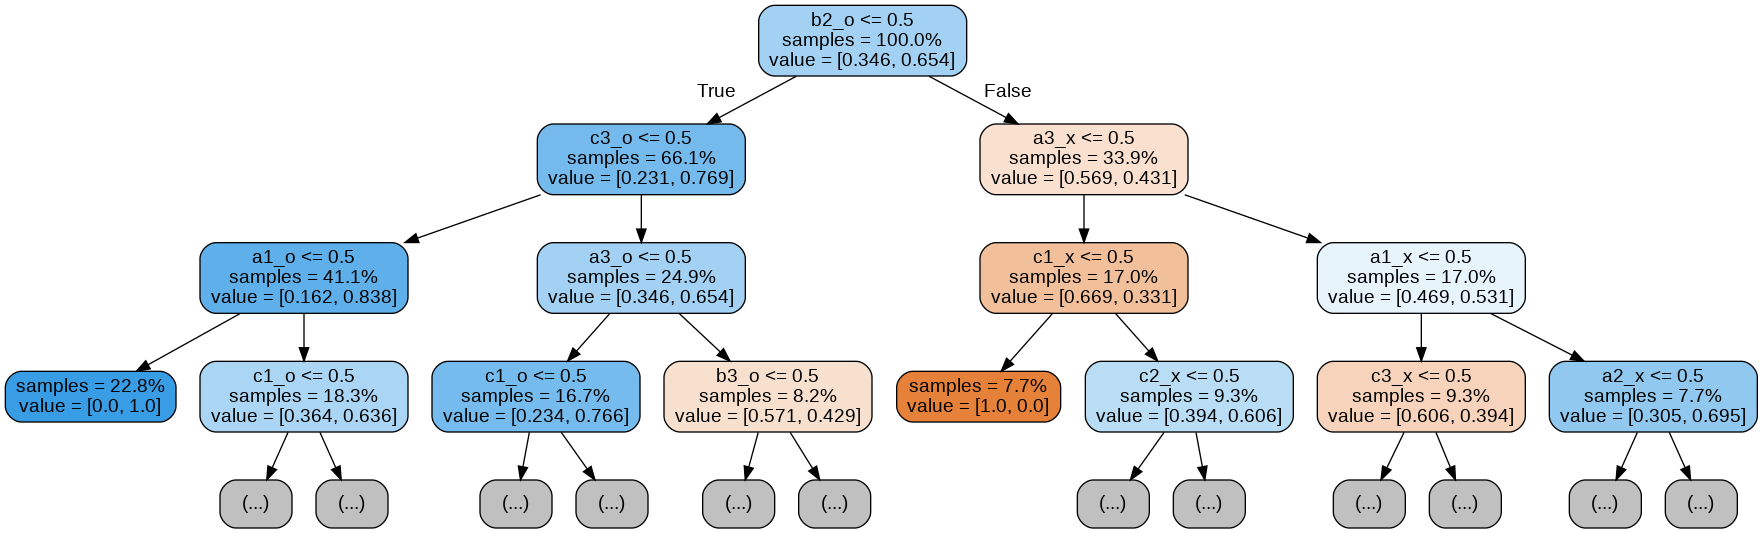

In [18]:
from IPython.display import Image, display

display(Image(filename="decision_tree.png"))